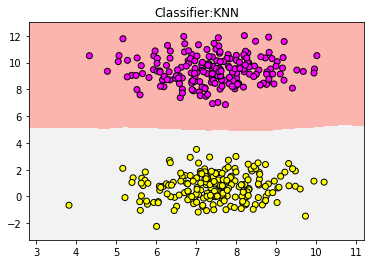

In [3]:
class KNNClassify():                       
    def __init__(self,k=5, p=2):#k=5，比较5个点
 
        self.k = k
        self.p = p
        self._X_train = None
        self._y_train = None
 
    def fit(self, X_train, y_train):
 
        self._X_train = X_train
        self._y_train = y_train
        return self
 
    def predict_y(self, X_test):#预测y的数据
    #step1 计算
        m = self._X_train.shape[0]
        y_pre = []
        for intX in X_test:
            minus_mat = np.fabs(np.tile(intX, (m, 1)) - self._X_train)       # 将新的实例复制成m行1列，并进行相减
            sq_minus_mat = minus_mat ** self.p                               #把数据平方
            sq_distance = sq_minus_mat.sum(axis=1)                          #数据累加
            diff_sq_distance = sq_distance ** float(1/self.p)               #数据开方
    #step2 对距离排序
            sorted_distance_index = diff_sq_distance.argsort()               # 记录距离最近的k个点的索引
            class_count = {}       
            vola = []  
    #step3 选择k个最近邻
            for i in range(self.k):
                vola = self._y_train[sorted_distance_index[i]]           
    #step4 计算k个最近邻中个类别出现的次数
                class_count[vola] = class_count.get(vola, 0) + 1             # 统计k个点中所属各个类别的实例数目
 
            sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)    # 返回列表，元素为元组。每个类别以及对应的实例数目
            y_pre.append((sorted_class_count[0][0]))
        return (np.array(y_pre))
 




import numpy as np
import operator
#导入数据集生成器
from sklearn.datasets import make_blobs
#导入画图工具
import matplotlib.pyplot as plt

data = make_blobs(n_samples=400, centers =2,random_state=8) 
X, y = data
# 定义分类器的实例，并进行拟合预测
f = KNNClassify()
f.fit(X, y)
#下面的代码用于画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +  1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   
xx, yy = np.meshgrid(np.arange(x_min, x_max,  .02),np.arange(y_min, y_max, .02)) 

Z = f.predict_y(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, edgecolor='k') 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")
plt.show()
